### Week 2 Data Exploration

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will explore the user and order data from JD.com.

1. We import the necessary packages.

In [2]:
import pandas as pd

2. We read in the datasets.

In [3]:
order=pd.read_csv('JD_order_data.csv')
user=pd.read_csv('JD_user_data.csv')

3. Take a look at the data

In [4]:
# The head() displays a sample of the dataset
order.head(5)
# The number argument specifies the number of rows to show

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


4. Explore a single categorical variable

In [5]:
# Displays the variables of the dataframe
order.columns

Index(['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity',
       'type', 'promise', 'original_unit_price', 'final_unit_price',
       'direct_discount_per_unit', 'quantity_discount_per_unit',
       'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
       'dc_ori', 'dc_des'],
      dtype='object')

In [6]:
# Let's explore the gender variable in users
user['gender'].head()
# value_counts() gives the frequency distribution
user['gender'].value_counts()

0    F
1    U
2    F
3    M
4    U
Name: gender, dtype: object

gender
F    292897
M    107084
U     57317
Name: count, dtype: int64

<Axes: xlabel='gender'>

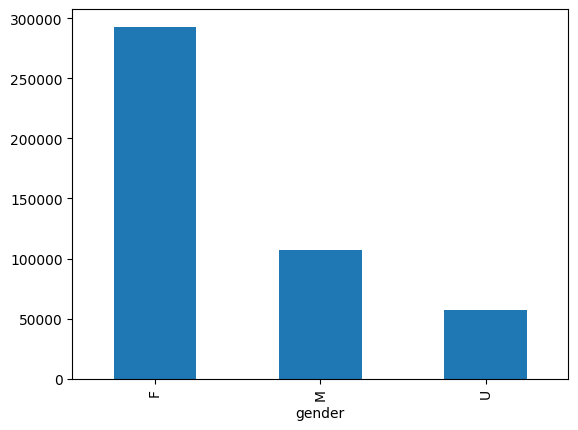

In [7]:
# Make a bar chart for the frequency distribution
user['gender'].value_counts().plot(kind='bar')

In [8]:
# Exercise: explore variable 'age'
user['age'].head()

0    26-35
1        U
2     >=56
3    26-35
4        U
Name: age, dtype: object

In [9]:
user['age'].value_counts()

age
26-35    183239
16-25    103306
36-45     81076
U         56457
46-55     18679
>=56      14517
<=15         24
Name: count, dtype: int64

<Axes: xlabel='age'>

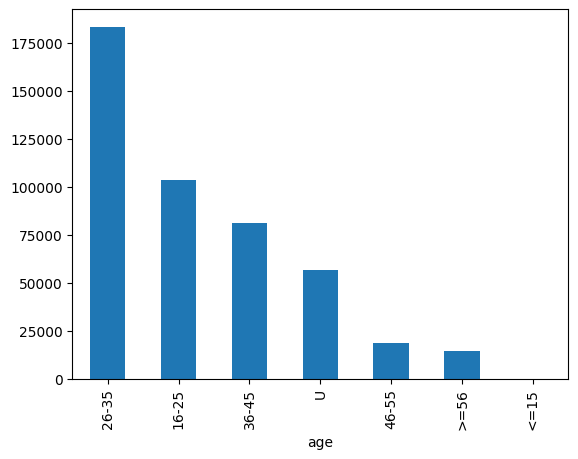

In [10]:
user['age'].value_counts().plot(kind='bar')

5. Explore a single inteval variable

In [11]:
order['original_unit_price'].describe()

count    549989.000000
mean        102.813542
std          95.035563
min           0.000000
25%          59.000000
50%          79.000000
75%         139.000000
max       12158.000000
Name: original_unit_price, dtype: float64

In [12]:
import numpy as np

import matplotlib.pyplot as plt

In [13]:
# Find quantile or percentile
np.quantile(order['original_unit_price'],0.99)

np.float64(336.0)

In [14]:
# Find the records with the maximum price
# The max price is an outlier
order['original_unit_price'].max()
# We use the comparison to slice the original dataset

np.float64(12158.0)

(array([5.49971e+05, 5.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([    0. ,  1215.8,  2431.6,  3647.4,  4863.2,  6079. ,  7294.8,
         8510.6,  9726.4, 10942.2, 12158. ]),
 <BarContainer object of 10 artists>)

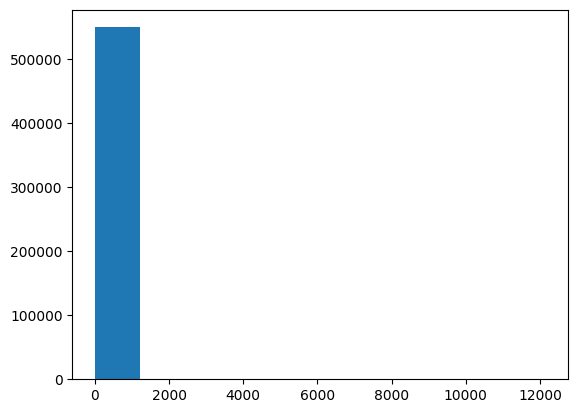

In [15]:
# A histogram to explore the distribution of the interval variable
# original price
plt.hist(order['original_unit_price'])
# The results are strongly affected by the maximum value.

In [16]:
# delete the maximum record
new = order[order['original_unit_price'] != 1258]

In [ ]:
# The histogram again
plt.hist(new)

(array([[1.58964e+05, 1.53644e+05, 1.55268e+05, 8.21130e+04, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [1.00000e+00, 0.00000e+00, 1.00000e+00, 8.46160e+04, 1.66461e+05,
         1.64644e+05, 1.34266e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 5.49989e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 5.49989e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 1.91360e+04, 1.82687e+05, 1.70966e+05, 1.77200e+05],
        [5.49989e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [5.49989e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+0

In [ ]:
# Delete the outliers using slicing


6. Explore the relationship between two interval variables

In [ ]:
# Make a scatterplot to explore the relationship between original and
# final price


In [ ]:
# A graph package that is built on matplotlib and asthetically better


7. Explore the relationship between an interval variable and a categorical variable